In [1]:

!python --version

Python 3.7.13


In [2]:
!pwd

/content


In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.3-bin-hadoop3.2.tgz   #extract the file using the tar command
!pip install -q findspark     #install python package 

spark-3.0.3-bin-hadoop3.2/
spark-3.0.3-bin-hadoop3.2/NOTICE
spark-3.0.3-bin-hadoop3.2/kubernetes/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop3.2/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop3.2/jars/
spark-3.0.3-bin-hadoop3.2/jars/hive-

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession  #Connect spark code on top of spark engine
spark = SparkSession.builder.master("local[4]").getOrCreate()

In [6]:
import pyspark
from pyspark.context import SparkContext 

from pyspark import SparkConf 
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[4]"))

In [8]:
aadhar_Data = spark.read.csv(header=True, inferSchema= True, path= "/content/drive/MyDrive/UIDAI.csv")
aadhar_Data.printSchema()
aadhar_Data.show(5)

root
 |-- Registrar: string (nullable = true)
 |-- EnrolmentAgency: string (nullable = true)
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- SubDistrict: string (nullable = true)
 |-- PIN: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- AadhaarGenerated: integer (nullable = true)
 |-- EnrolmentRejected: integer (nullable = true)
 |-- ResidentsProvidingEmail: integer (nullable = true)
 |-- ResidentsProvidingMobile: integer (nullable = true)

+--------------+--------------------+-------------+---------+-----------+------+------+---+----------------+-----------------+-----------------------+------------------------+
|     Registrar|     EnrolmentAgency|        State| District|SubDistrict|   PIN|Gender|Age|AadhaarGenerated|EnrolmentRejected|ResidentsProvidingEmail|ResidentsProvidingMobile|
+--------------+--------------------+-------------+---------+-----------+------+------+---+----------------+-----

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Spark SQL**

**Gender count from the dataset**

In [ ]:
aadhar_Data.createOrReplaceTempView("aadhar_Data1")
gender_count = spark.sql("SELECT Gender FROM aadhar_Data1")
aadhar_Data.groupBy("Gender").count().show()


+------+------+
|Gender| count|
+------+------+
|     F|148013|
|     T|     7|
|     M|292798|
+------+------+



In [ ]:
total_records = aadhar_Data.count()
print("Total records:" + str(total_records))

Total records:440818


**No of records grouped by states**

In [ ]:

aadhar_Data.groupBy("State").count().show()

+--------------------+-----+
|               State|count|
+--------------------+-----+
|            Nagaland|  392|
|           Karnataka|15755|
|              Odisha|11972|
|              Kerala|12378|
|          Tamil Nadu|21196|
|        Chhattisgarh| 4617|
|      Andhra Pradesh| 4540|
|         Lakshadweep|    5|
|      Madhya Pradesh|37360|
|              Punjab| 5888|
|             Manipur|  562|
|                 Goa|  799|
|             Mizoram| 3172|
|Dadra and Nagar H...|  107|
|    Himachal Pradesh| 1283|
|          Puducherry|   85|
|             Haryana| 5138|
|   Jammu and Kashmir| 1331|
|           Jharkhand| 7423|
|   Arunachal Pradesh|  632|
+--------------------+-----+
only showing top 20 rows



**State and Gender from the Data**

In [ ]:
gender_state_wise = spark.sql("SELECT State, Gender FROM aadhar_Data1")
gender_state_wise.show()


+-------------+------+
|        State|Gender|
+-------------+------+
|Uttar Pradesh|     F|
|Uttar Pradesh|     M|
|Uttar Pradesh|     F|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|Uttar Pradesh|     M|
|        Assam|     M|
|        Bihar|     M|
|    Karnataka|     M|
|    Karnataka|     F|
|    Karnataka|     M|
|    Karnataka|     F|
|    Karnataka|     M|
|    Karnataka|     F|
|    Karnataka|     M|
+-------------+------+
only showing top 20 rows



**Records where age is greater than 21**

In [ ]:
age_21_and_above= aadhar_Data.filter(aadhar_Data['age'] >= 21).show()

+--------------------+--------------------+---------+---------+-----------+------+------+---+----------------+-----------------+-----------------------+------------------------+
|           Registrar|     EnrolmentAgency|    State| District|SubDistrict|   PIN|Gender|Age|AadhaarGenerated|EnrolmentRejected|ResidentsProvidingEmail|ResidentsProvidingMobile|
+--------------------+--------------------+---------+---------+-----------+------+------+---+----------------+-----------------+-----------------------+------------------------+
|Atalji Janasnehi ...|Atalji Janasnehi ...|    Assam| Marigaon|  Bhuragaon|782121|     M| 22|               1|                0|                      0|                       1|
|Atalji Janasnehi ...|Atalji Janasnehi ...|    Bihar|Gopalganj| Vijayeepur|841508|     M| 26|               1|                0|                      0|                       1|
|Atalji Janasnehi ...|Atalji Janasnehi ...|Karnataka| Bagalkot|     Badami|587114|     M| 27|               1|

**Retrieval of state and different pin codes used in each state**

In [ ]:
pincodes=spark.sql("SELECT DISTINCT State,Pin FROM aadhar_Data1")
pincodes.show()

+--------------+------+
|         State|   Pin|
+--------------+------+
| Uttar Pradesh|222143|
|         Assam|785601|
|         Bihar|812005|
|         Bihar|847307|
|         Bihar|805131|
|         Bihar|805125|
|Andhra Pradesh|524307|
|    Tamil Nadu|600074|
|    Tamil Nadu|638151|
|    Tamil Nadu|630002|
|    Tamil Nadu|621006|
|    Tamil Nadu|601205|
|     Telangana|500086|
|       Haryana|122504|
|     Rajasthan|345023|
| Uttar Pradesh|201304|
| Uttar Pradesh|210423|
|   Maharashtra|425110|
|        Punjab|148101|
|        Punjab|144025|
+--------------+------+
only showing top 20 rows



**Count of male and female in each state**

In [ ]:
statesGender = spark.sql("SELECT State,count(CASE WHEN Gender='M' THEN 1 END) as countMale,count(CASE WHEN Gender='F' THEN 1 END) as countFemale FROM aadhar_Data1 group By State order by countMale DESC,countFemale DESC")
statesGender.show()

+--------------+---------+-----------+
|         State|countMale|countFemale|
+--------------+---------+-----------+
|         Bihar|    54819|      26957|
| Uttar Pradesh|    47853|      21623|
|   West Bengal|    35660|      24823|
|Madhya Pradesh|    24611|      12747|
|     Rajasthan|    19523|       9135|
|       Gujarat|    16060|       8086|
|    Tamil Nadu|    13877|       7319|
|   Maharashtra|    12691|       7092|
|        Kerala|    10398|       1980|
|     Karnataka|     9932|       5822|
|        Odisha|     6830|       5141|
|   Uttarakhand|     4780|       1741|
|     Jharkhand|     4756|       2667|
|         Delhi|     4598|       2649|
|        Punjab|     3954|       1934|
|       Haryana|     3634|       1504|
|Andhra Pradesh|     3492|       1048|
|  Chhattisgarh|     3271|       1346|
|     Telangana|     2883|        885|
|         Assam|     2670|        302|
+--------------+---------+-----------+
only showing top 20 rows



##VISUALIZATIONS

In [9]:
import pandas as pd
enrolmentagency = aadhar_Data.groupBy('EnrolmentAgency').count()
enrolmentagency_count = enrolmentagency.orderBy('count', ascending=False)
count_enrolmentagency = pd.DataFrame(enrolmentagency_count.rdd.map(lambda line: line.asDict()).collect()).head(20)

In [10]:
count_enrolmentagency.head(20)

,EnrolmentAgency,count
0,CSC SPV,100357
1,SRM Education And Social Welfare Society,18101
2,SREI INFRASTRUCTURE FINANCES L,16972
3,Rajcomp Info Services Ltd,12910
4,AKSH OPTIFIBRE LIMITED,12580
5,TAMILNADU ARASU CABLE TV CORPORATION LTD,12114
6,Akshaya,11937
7,MPOnline Limited,10808
8,CMS Computers Ltd,9229
9,IAP COMPANY Pvt. Ltd,7537


[Text(0, 0.5, 'Enrolment agencies'), Text(0.5, 0, 'count')]

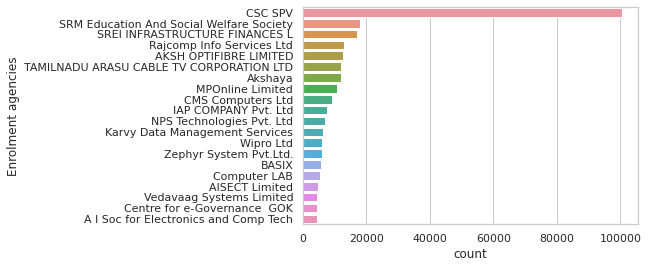

In [11]:
import seaborn as sns
## Just some seaborn params for a better view
sns.set(style="whitegrid")
sns.set_color_codes("dark")

type_graph = sns.barplot(x='count', y='EnrolmentAgency', data=count_enrolmentagency)
type_graph.set(ylabel="Enrolment agencies", xlabel="count")

#Visualizing data records by primary type and their count


In [12]:
import pandas as pd
registrar = aadhar_Data.groupBy('Registrar').count()
registrar_count = registrar.orderBy('count', ascending=False)
count_registrar = pd.DataFrame(registrar_count.rdd.map(lambda line: line.asDict()).collect()).head(20)

[Text(0, 0.5, 'Enrolment agencies'), Text(0.5, 0, 'count')]

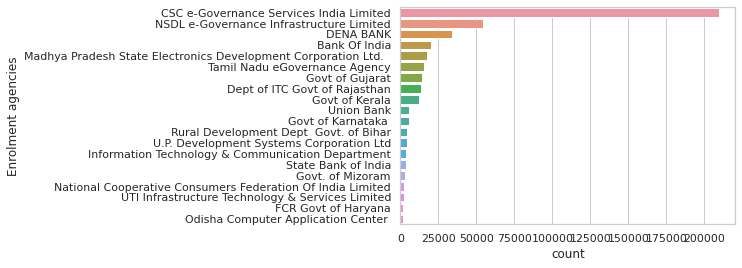

In [13]:
sns.set(style="whitegrid")
sns.set_color_codes("dark")

type_graph = sns.barplot(x='count', y='Registrar', data=count_registrar)
type_graph.set(ylabel="Enrolment agencies", xlabel="count")

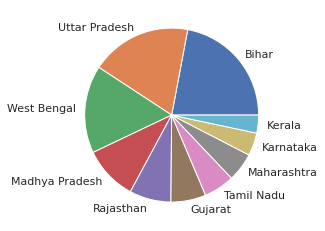

In [15]:
import matplotlib.pyplot as plt
def pieplot(df, col, lim=10, yname=None):
   ##The above function makes piechart for categorical columns and returns top categories as specified by the lim
    # Grouping by the categories, counting on each categories 
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)
    
    # Take first 'lim' number of rows and convert to pandas  
    pd_df = classes.limit(lim).toPandas()
    
    # Making plot 
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.ylabel(None)
    plt.show()
pieplot(aadhar_Data, 'State')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = sc.textFile("/content/drive/MyDrive/UIDAI.csv").map(lambda x : x.split(','))

##**UTTAR PRADESH**

**MALE AND FEMALE IN THE STATE OF UTTAR PRADESH**

In [ ]:
data_up = data.filter(lambda x : x[2] == "Uttar Pradesh").map(lambda x : (x[2],x[6]))
data_up.collect()

[('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'F'),
 ('Uttar Pradesh', 'M'),


In [ ]:
gender_up = data_up.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
type(data_up)

pyspark.rdd.PipelinedRDD

In [ ]:
gender_up

[('F', 21623), ('M', 47853)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_up])
y = np.array([c[1] for c in gender_up])

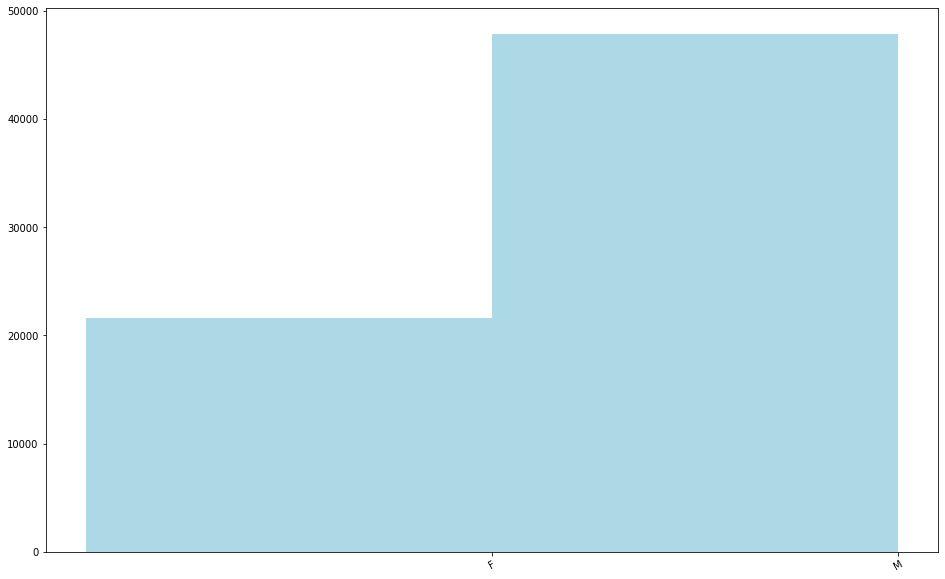

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Aadhar generated in each enrolment agency of Uttar Pradesh**

In [ ]:
data_aadhar_gen = data.filter(lambda x : x[2] == "Uttar Pradesh").map(lambda x : (x[1],x[8]))
data_aadhar_gen.collect()

[('A-Onerealtors Pvt Ltd', '1'),
 ('Asha Security Guard Services', '1'),
 ('SGS INDIA PVT LTD', '1'),
 ('Sri Ramraja Sarkar Lok Kalyan Trust', '1'),
 ('Transmoovers India', '1'),
 ('Transmoovers India', '1'),
 ('Transmoovers India', '1'),
 ('Transmoovers India', '1'),
 ('Transmoovers India', '0'),
 ('Transmoovers India', '1'),
 ('Vedavaag Systems Limited', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVICES(P)', '1'),
 ('DATASOFT COMPUTER SERVI

In [ ]:
type(data_aadhar_gen)

pyspark.rdd.PipelinedRDD

In [ ]:
aadhar_gen_up = data_aadhar_gen.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
aadhar_gen_up

[('Zephyr System Pvt.Ltd.', 746),
 ('Yuvaan Infotech', 594),
 ('Yashi Informatics LLP', 3),
 ('Yash Ornaments Pvt. Ltd', 400),
 ('Wipro Ltd', 26),
 ('WEBEL TECHNOLOGY LIMITED', 164),
 ('Virinchi Technologies Ltd', 107),
 ('Vedavaag Systems Limited', 2106),
 ('Vayam technologies Ltd', 333),
 ('Vakrangee Softwares Limited', 638),
 ('VISION COMPTECH INTEGRATOR LTD', 26),
 ('VIRGO SOFTECH LIMITED', 27),
 ('VEETECHNOLOGIES PVT. LTD', 3),
 ('VAP INFOSOLUTIONS', 300),
 ('Utility Forms Pvt Ltd', 180),
 ('United Telecoms Ltd', 5),
 ('UT of Daman and Diu', 2),
 ('UT Computers Educational & Welfare Soc', 104),
 ('UIDAI-EA', 2),
 ('UID e-Seva Society Ahmedabad', 1)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in aadhar_gen_up])
y = np.array([c[1] for c in aadhar_gen_up])

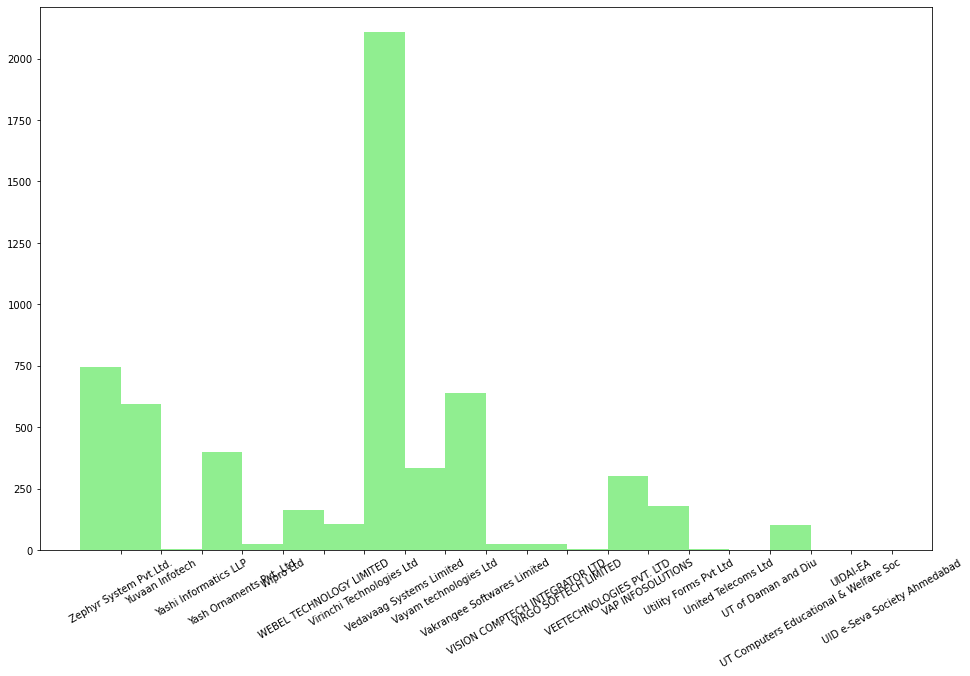

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightgreen')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Gender count in the user defined district of Uttar Pradesh**

In [ ]:
inp =str(input("enter the name of district: "))

enter the name of district: Sultanpur


In [ ]:
up_dist_gender = data.filter(lambda x : x[3] == inp).map(lambda x : (x[3],x[6]))
up_dist_gender.collect()

[('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'F'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur', 'M'),
 ('Sultanpur'

In [ ]:
gender_up_dist = up_dist_gender.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_up_dist

[('F', 171), ('M', 511)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_up_dist])
y = np.array([c[1] for c in gender_up_dist])

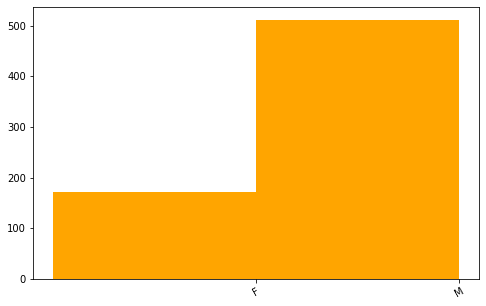

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='orange')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8,5)

**No of successful aadhar generated in the allahabad bank registrar**

In [ ]:
inp =str(input("enter the name of registrar: "))

enter the name of registrar: Allahabad Bank


In [ ]:
data_registrar = data.filter(lambda x : x[0] == inp).map(lambda x : (x[0],x[8]))
data_registrar.collect()

[('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '0'),
 ('Allahabad Bank', '1'),
 ('Allahabad Bank', '1')]

In [ ]:
aadhar_generated = data_registrar.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
aadhar_generated

[('1', 10), ('0', 1)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in aadhar_generated])
y = np.array([c[1] for c in aadhar_generated])

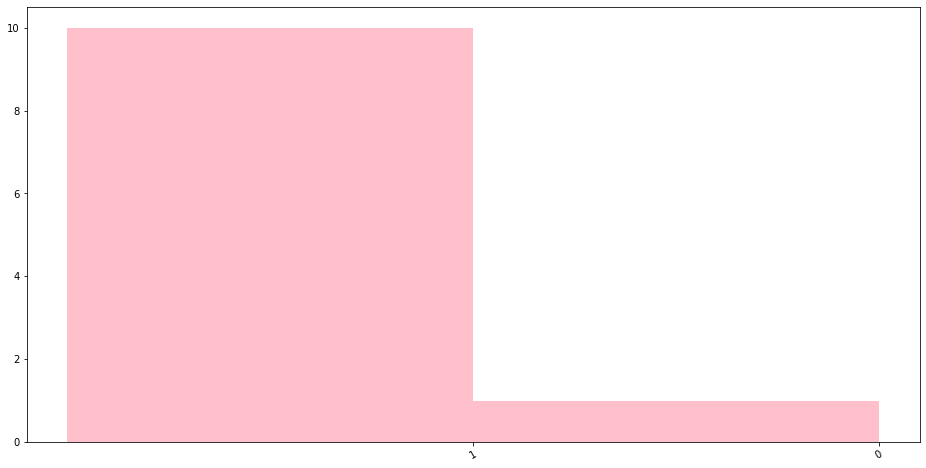

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='pink')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16,8)

**No of rejected aadhar cards in the districts of Uttar Pradesh**

In [ ]:
aadhar_reject_ = data.filter(lambda x : x[2] == "Uttar Pradesh").map(lambda x : (x[3],x[9]))
aadhar_reject_.collect()

[('Allahabad', '0'),
 ('Sonbhadra', '0'),
 ('Sultanpur', '0'),
 ('Shamli', '0'),
 ('Gorakhpur', '0'),
 ('Varanasi', '0'),
 ('Varanasi', '0'),
 ('Varanasi', '0'),
 ('Varanasi', '1'),
 ('Varanasi', '0'),
 ('Bara Banki', '0'),
 ('Ghazipur', '0'),
 ('Pratapgarh', '0'),
 ('Ambedkar Nagar', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Sultanpur', '0'),
 ('Fatehpur', '0'),
 ('Jhansi', '1'),
 ('Unnao', '0'),
 ('Jaunpur', '0'),
 ('Agra', '0'),
 ('Agra', '0'),
 ('Agra', '0'),
 ('Agra', '0'),
 ('Agra', '0'),
 ('Aligarh', '0'),
 ('Aligarh', '0'),
 ('Aligarh', '0'),
 ('Aligarh', '0'),
 ('Allahabad', '0'),
 ('Allahabad', '0'),
 ('Allahabad', '0'),
 ('Allahabad', '

In [ ]:
enrol_reject = aadhar_reject_.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
enrol_reject

[('Varanasi', 1530),
 ('Unnao', 789),
 ('Sultanpur', 682),
 ('Sonbhadra', 308),
 ('Sitapur', 1402),
 ('Siddharthnagar', 1083),
 ('Shrawasti', 972),
 ('Shamli', 439),
 ('Shahjahanpur', 901),
 ('Sant Ravidas Nagar', 451),
 ('Sant Kabir Nagar', 556),
 ('Sambhal', 1127),
 ('Saharanpur', 844),
 ('Rampur', 644),
 ('Rae Bareli', 731),
 ('Pratapgarh', 730),
 ('Pilibhit', 475),
 ('Muzaffarnagar', 1372),
 ('Moradabad', 770),
 ('Mirzapur', 1154)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in enrol_reject])
y = np.array([c[1] for c in enrol_reject])

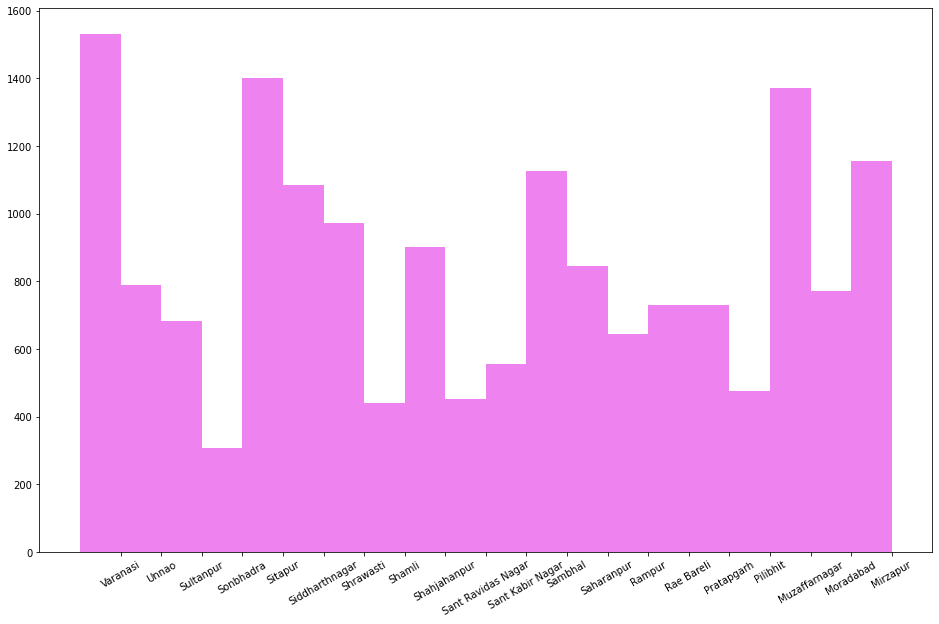

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='violet')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

#**KARNATAKA**

**Male and female in the state of Karnataka**

In [ ]:
data_kar = data.filter(lambda x : x[2] == "Karnataka").map(lambda x : (x[2],x[6]))
data_kar.collect()

[('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'M'),
 ('Karnataka', 'F'),
 ('Karnataka', 'F'),
 ('Karnataka'

In [ ]:
gender_karnataka = data_kar.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_karnataka

[('M', 9932), ('F', 5822), ('T', 1)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_karnataka])
y = np.array([c[1] for c in gender_karnataka])

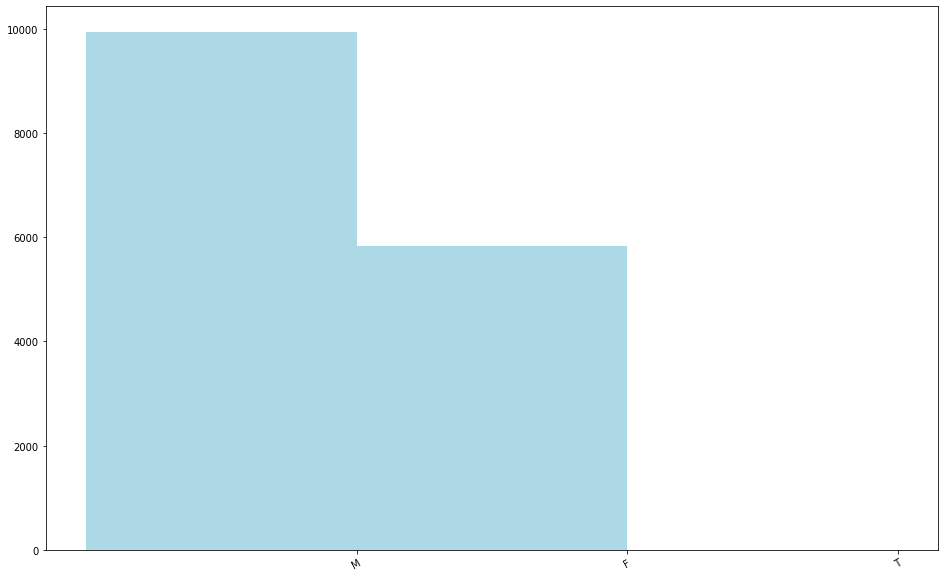

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Aadhar generated in each enrolment agency of Karnataka**

In [ ]:
data_aadhar_gen_kar = data.filter(lambda x : x[2] == "Karnataka").map(lambda x : (x[1],x[8]))
data_aadhar_gen_kar.collect()

[('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '0'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '0'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji Janasnehi Directorate  GOK', '1'),
 ('Atalji 

In [ ]:
aadhar_gen_kar = data_aadhar_gen_kar.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
aadhar_gen_kar

[('Zephyr System Pvt.Ltd.', 224),
 ('Yash Ornaments Pvt. Ltd', 1),
 ('Wipro Ltd', 1),
 ('Wedha Communication Pvt Ltd', 1),
 ('Virinchi Technologies Ltd', 158),
 ('Vakrangee Softwares Limited', 2),
 ('VEETECHNOLOGIES PVT. LTD', 47),
 ('Utility Forms Pvt Ltd', 258),
 ('UIDAI-EA', 4),
 ('UID e-Seva Society Ahmedabad', 1),
 ('Twinstar Industries Ltd.', 55),
 ('Synapses Solutions Private Limited', 18),
 ('Steel City Securities Limited', 1),
 ('Sri Ramraja Sarkar Lok Kalyan Trust', 1),
 ('Smart Chip Limited', 1),
 ('SRM Education And Social Welfare Society', 492),
 ('SREI INFRASTRUCTURE FINANCES L', 153),
 ('SGS INDIA PVT LTD', 57),
 ('SARADA SYSTEMS', 1),
 ('Rajcomp Info Services Ltd', 2)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in aadhar_gen_kar])
y = np.array([c[1] for c in aadhar_gen_kar])

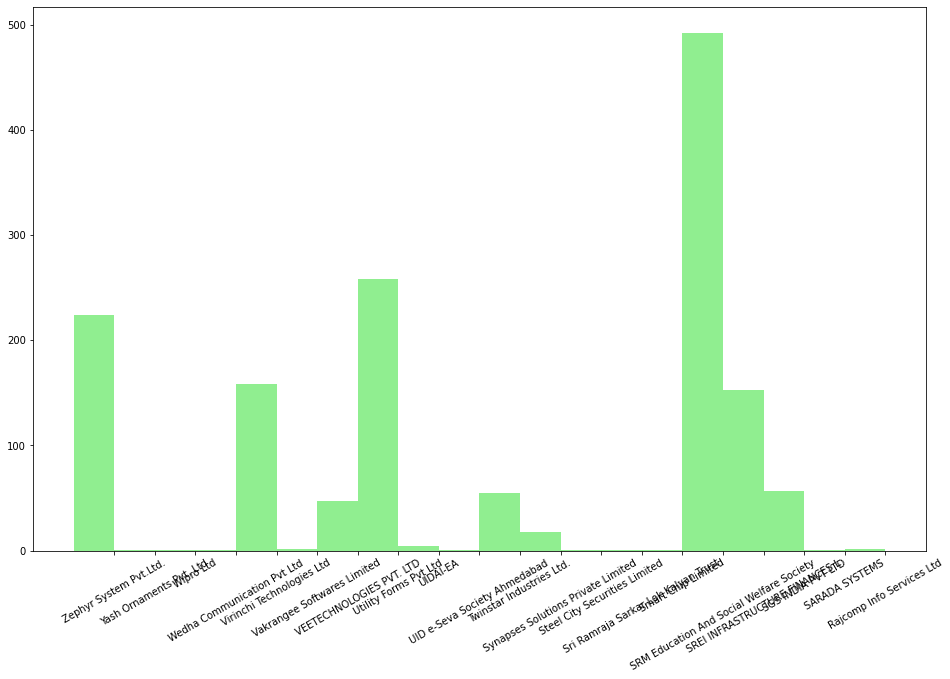

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightgreen')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Gender count in the user defined district of Karnataka**

In [ ]:
inp =str(input("enter the name of district: "))

enter the name of district: Ballari


In [ ]:
Ballari_gender = data.filter(lambda x : x[3] == inp).map(lambda x : (x[3],x[6]))   #eg:Ballari
Ballari_gender.collect()

[('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'F'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari', 'M'),
 ('Ballari',

In [ ]:
gender_ballari = Ballari_gender.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_ballari

[('F', 166), ('M', 361)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_ballari])
y = np.array([c[1] for c in gender_ballari])

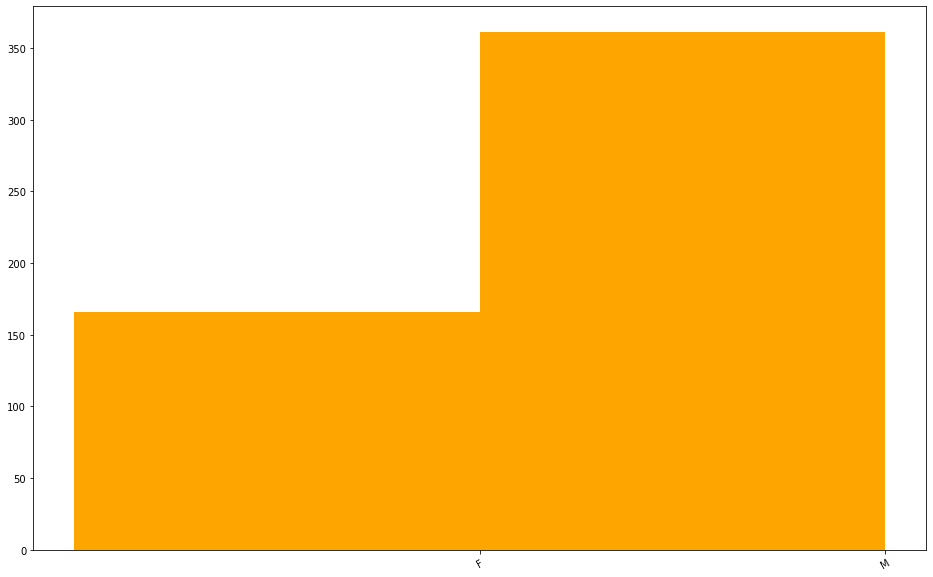

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='orange')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**No of rejected aadhar cards in the districts of Karnataka**

In [ ]:
aadhar_generated_karnataka = data.filter(lambda x : x[2] == "Karnataka").map(lambda x : (x[3],x[9]))
aadhar_generated_karnataka.collect()

[('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '1'),
 ('Bagalkot', '0'),
 ('Bagalkot', '1'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '1'),
 ('Bagalkot', '1'),
 ('Bagalkot', '1'),
 ('Bagalkot', '0'),
 ('Bagalkot', '1'),
 ('Bagalkot', '1'),
 ('Bagalkot', '0'),
 ('Bagalkot', '0'),
 ('Bagalkot', '1'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '1'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '1'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),
 ('Ballari', '0'),

In [ ]:
enrol_reject_kar = aadhar_generated_karnataka.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
enrol_reject_kar

[('Yadgir', 280),
 ('Vijayapura', 810),
 ('Uttara Kannada', 356),
 ('Udupi', 146),
 ('Tumakuru', 432),
 ('Shivamogga', 295),
 ('Ramanagar', 157),
 ('Raichur', 775),
 ('Mysuru', 478),
 ('Mandya', 297),
 ('Koppal', 252),
 ('Kolar', 364),
 ('Kodagu', 72),
 ('Kalaburagi', 987),
 ('Haveri', 337),
 ('Hassan', 206),
 ('Gadag', 209),
 ('Dharwad', 546),
 ('Davangere', 512),
 ('Dakshina Kannada', 593)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in enrol_reject_kar])
y = np.array([c[1] for c in enrol_reject_kar])

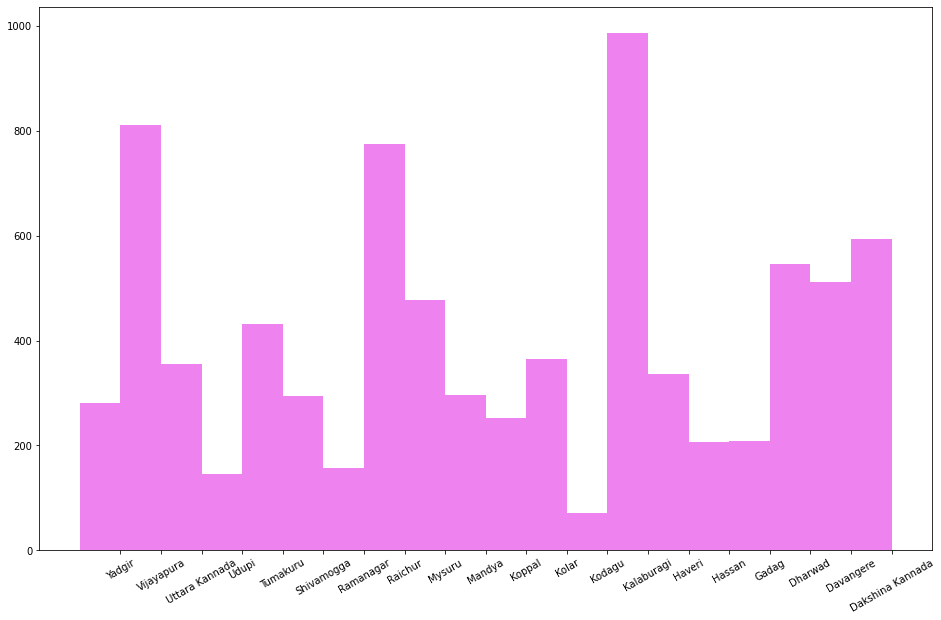

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='violet')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

#**MAHARASHTRA**

**Male and Female in the State of Maharashtra**

In [ ]:
data_mahar = data.filter(lambda x : x[2] == "Maharashtra").map(lambda x : (x[2],x[6]))
data_mahar.collect()

[('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'M'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharashtra', 'F'),
 ('Maharash

In [ ]:
gender_maharashtra = data_mahar.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_maharashtra

[('F', 7092), ('M', 12691)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_maharashtra])
y = np.array([c[1] for c in gender_maharashtra])

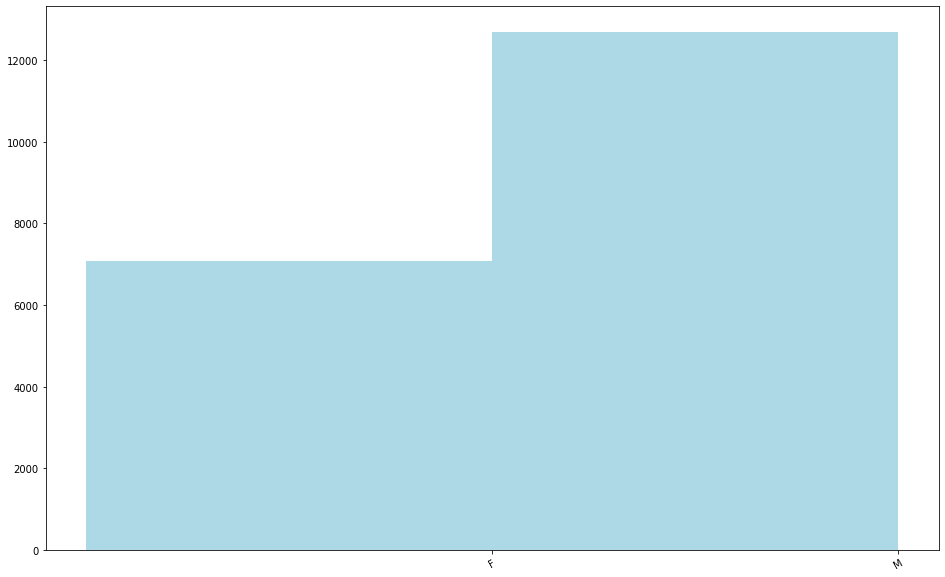

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Aadhar generated in each enrolment agency of Maharashtra**

In [ ]:
data_aadhar_gen_mah = data.filter(lambda x : x[2] == "Maharashtra").map(lambda x : (x[1],x[8]))
data_aadhar_gen_mah.collect()

[('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '2'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CONSULTANTS PVT LTD', '1'),
 ('CHESSY CO

In [ ]:
aadhar_gen_mah = data_aadhar_gen_mah.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
aadhar_gen_mah

[('eCentric solutions pvt ltd', 1),
 ('Zephyr System Pvt.Ltd.', 302),
 ('Wipro Ltd', 24),
 ('Wedha Communication Pvt Ltd', 129),
 ('Virinchi Technologies Ltd', 9),
 ('Vakrangee Softwares Limited', 713),
 ('VEETECHNOLOGIES PVT. LTD', 7),
 ('Utility Forms Pvt Ltd', 183),
 ('United Telecoms Ltd', 1),
 ('UT of Daman and Diu', 1),
 ('UIDAI-EA', 1),
 ('Twinstar Industries Ltd.', 64),
 ('Transline Technologies P Ltd', 30),
 ('Synapses Solutions Private Limited', 216),
 ('Steel City Securities Limited', 14),
 ('Sri Ramraja Sarkar Lok Kalyan Trust', 1),
 ('Squaria Global India Private Limited', 1),
 ('Silver Touch Technologies Ltd', 10),
 ('Seva Society Collector Kutch', 1),
 ('Saket Advertising Pvt. Ltd', 1)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in aadhar_gen_mah])
y = np.array([c[1] for c in aadhar_gen_mah])

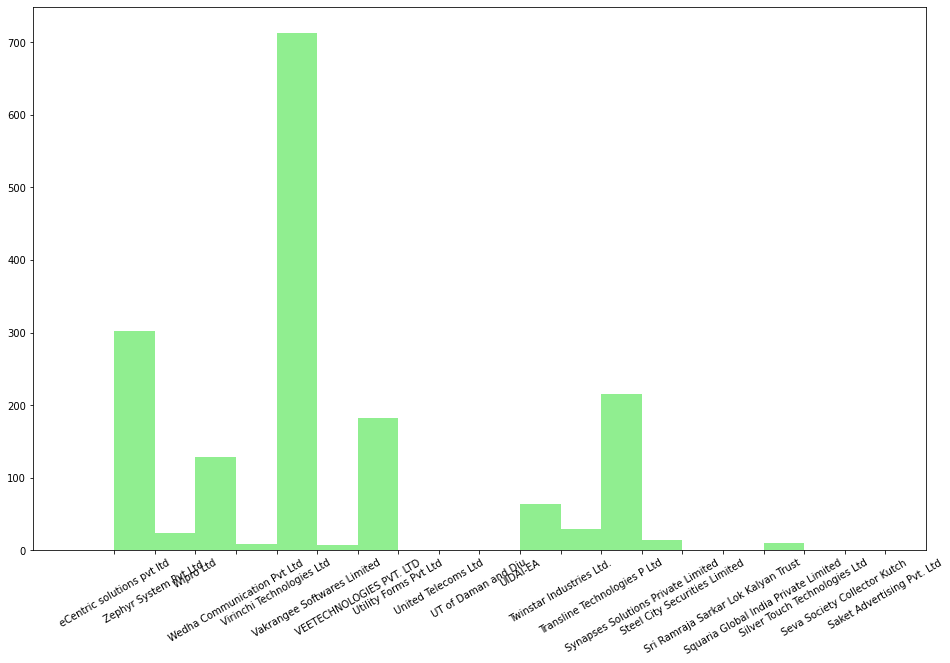

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightgreen')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Gender count in the user defined district of Maharashtra**

In [ ]:
inp =str(input("enter the name of district: "))  #Mumbai

enter the name of district: Mumbai


In [ ]:
mumbai_gender = data.filter(lambda x : x[3] == "Mumbai").map(lambda x : (x[3],x[6]))
mumbai_gender.collect()

[('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'M'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'F'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai', 'M'),
 ('Mumbai'

In [ ]:
gender_mumbai = mumbai_gender.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_mumbai

[('F', 249), ('M', 563)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_mumbai])
y = np.array([c[1] for c in gender_mumbai])

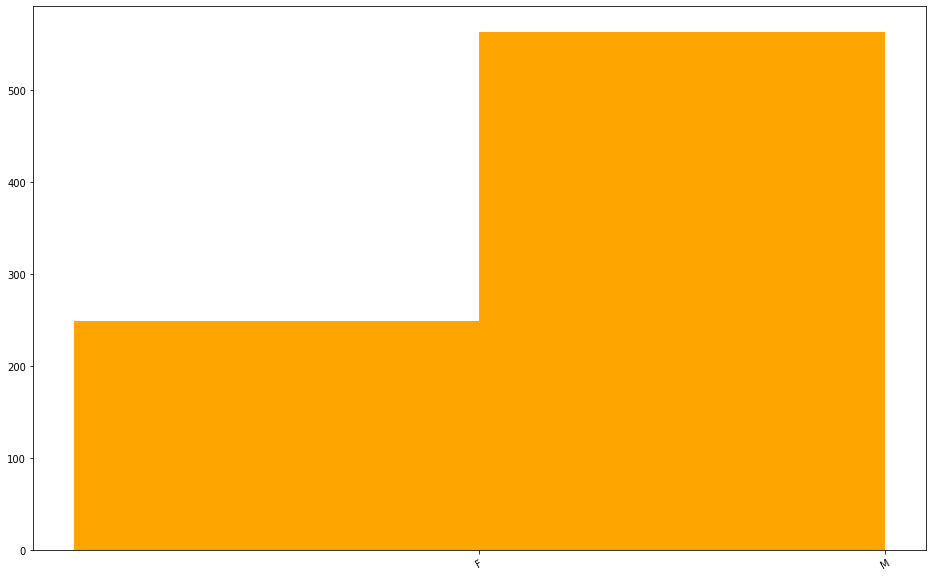

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='Orange')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**No of rejected aadhar cards in the districts of Maharashtra**

In [ ]:
aadhar_generated_mah = data.filter(lambda x : x[2] == "Maharashtra").map(lambda x : (x[3],x[9]))
aadhar_generated_mah.collect()

[('Mumbai', '0'),
 ('Mumbai', '0'),
 ('Mumbai', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Mumbai Suburban', '0'),
 ('Palghar', '0'),
 ('Palghar', '0'),
 ('Palghar', '0'),
 ('Palghar', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '1'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '1'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '0'),
 ('Thane', '

In [ ]:
enrol_reject_mah = aadhar_generated_.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
enrol_reject_mah

[('Varanasi', 1530),
 ('Unnao', 789),
 ('Sultanpur', 682),
 ('Sonbhadra', 308),
 ('Sitapur', 1402),
 ('Siddharthnagar', 1083),
 ('Shrawasti', 972),
 ('Shamli', 439),
 ('Shahjahanpur', 901),
 ('Sant Ravidas Nagar', 451),
 ('Sant Kabir Nagar', 556),
 ('Sambhal', 1127),
 ('Saharanpur', 844),
 ('Rampur', 644),
 ('Rae Bareli', 731),
 ('Pratapgarh', 730),
 ('Pilibhit', 475),
 ('Muzaffarnagar', 1372),
 ('Moradabad', 770),
 ('Mirzapur', 1154)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in enrol_reject_mah])
y = np.array([c[1] for c in enrol_reject_mah])

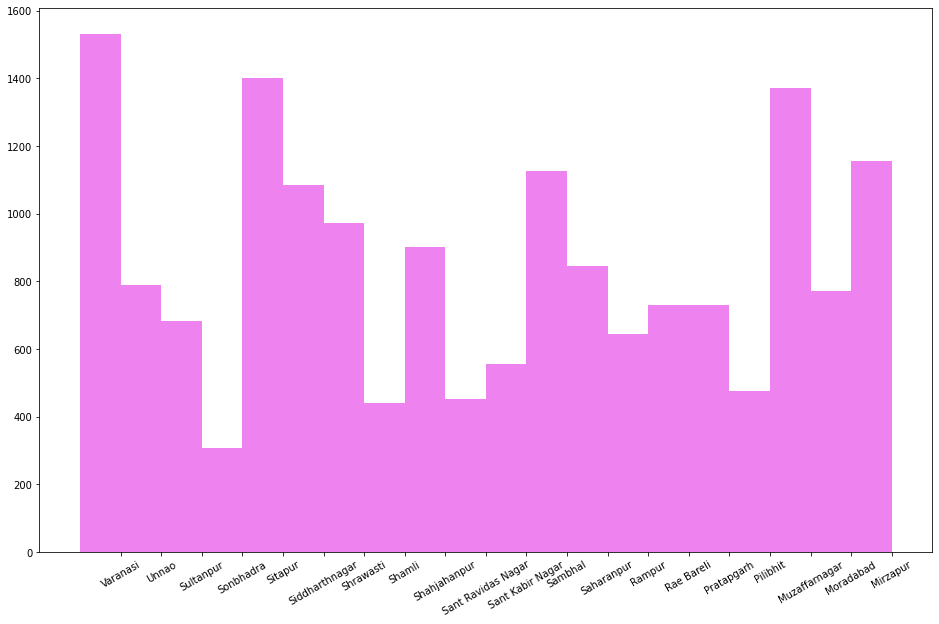

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='violet')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

#**WEST BENGAL**

**Male and Female in the state of West Bengal**

In [ ]:
data_WB = data.filter(lambda x : x[2] == "West Bengal").map(lambda x : (x[2],x[6]))
data_WB.collect()

[('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'M'),
 ('West Bengal', 'M'),
 ('West Bengal', 'M'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Bengal', 'F'),
 ('West Ben

In [ ]:
gender_westbengal = data_WB.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_westbengal

[('F', 24823), ('M', 35660), ('T', 2)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_westbengal])
y = np.array([c[1] for c in gender_westbengal])

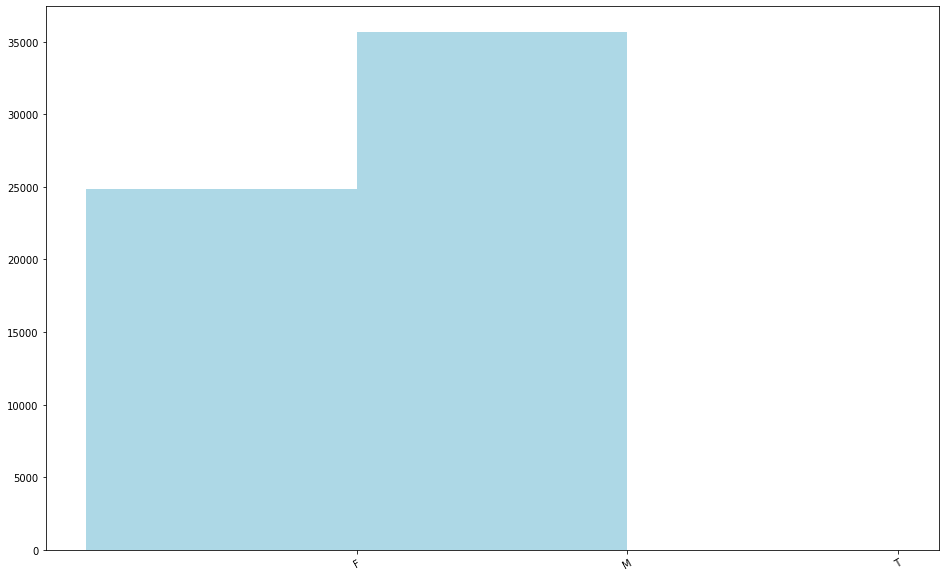

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Aadhar generated in each enrolment agency of West Bengal**

In [ ]:
data_aadhar_gen_WB = data.filter(lambda x : x[2] == "West Bengal").map(lambda x : (x[1],x[8]))
data_aadhar_gen_WB.collect()

[('OSWAL COMPUTERS & CONSULTANTS', '1'),
 ('OSWAL COMPUTERS & CONSULTANTS', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '2'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTEX COMPUTER PVT LTD', '1'),
 ('PROTE

In [ ]:
aadhar_gen_WB = data_aadhar_gen_WB.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
aadhar_gen_WB

[('Zephyr System Pvt.Ltd.', 1503),
 ('Wipro Ltd', 3048),
 ('WEBEL TECHNOLOGY LIMITED', 286),
 ('Virinchi Technologies Ltd', 2),
 ('Vedavaag Systems Limited', 78),
 ('Vayam technologies Ltd', 1),
 ('Vakrangee Softwares Limited', 29),
 ('VISION COMPTECH INTEGRATOR LTD', 457),
 ('VEETECHNOLOGIES PVT. LTD', 1),
 ('VAP INFOSOLUTIONS', 1),
 ('Utility Forms Pvt Ltd', 390),
 ('Urmila Info solution', 1),
 ('United Telecoms e-Services Pvt Ltd', 1),
 ('United Telecoms Ltd', 167),
 ('UT of Daman and Diu', 1),
 ('UT Computers Educational & Welfare Soc', 1),
 ('Twinstar Industries Ltd.', 1014),
 ('Techno Bytes Information Pvt. Ltd', 2449),
 ('TAMILNADU ARASU CABLE TV CORPORATION LTD', 5),
 ('Synapses Solutions Private Limited', 534)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in aadhar_gen_WB])
y = np.array([c[1] for c in aadhar_gen_WB])

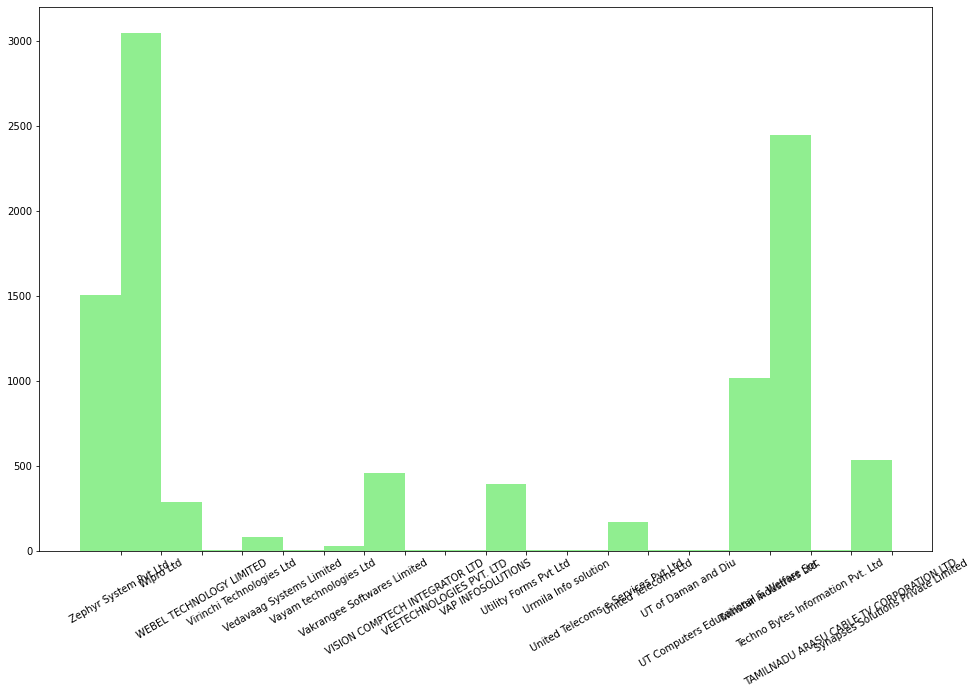

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightgreen')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**Gender count in the user defined district of WestBengal**

In [ ]:
inp =str(input("enter the name of district: ")) #Hooghly


enter the name of district: Hooghly


In [ ]:
hoogly_gender = data.filter(lambda x : x[3] == "Hooghly").map(lambda x : (x[3],x[6]))
hoogly_gender.collect()

[('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'F'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'M'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly', 'F'),
 ('Hooghly',

In [ ]:
gender_hoogly = hoogly_gender.map(lambda x : (x[1],1)).reduceByKey(lambda a,b : a+b).collect()

In [ ]:
gender_hoogly

[('F', 1126), ('M', 1027)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in gender_hoogly])
y = np.array([c[1] for c in gender_hoogly])

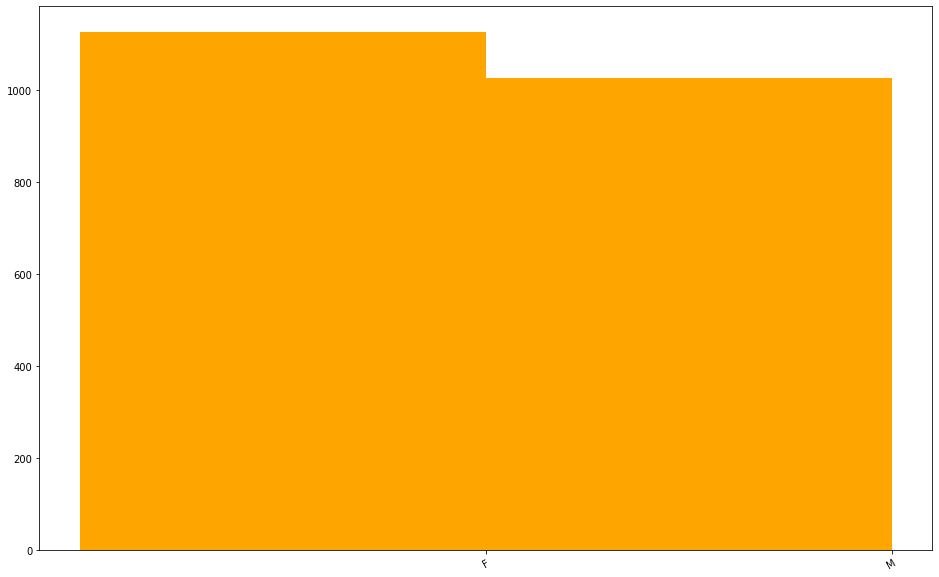

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='orange')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

**No of rejected aadhar cards in the districts of West Bengal**

In [ ]:
aadhar_generated_WB = data.filter(lambda x : x[2] == "West Bengal").map(lambda x : (x[3],x[9]))
aadhar_generated_WB.collect()

[('North 24 Parganas', '0'),
 ('North 24 Parganas', '0'),
 ('Bankura', '0'),
 ('Barddhaman', '0'),
 ('Barddhaman', '0'),
 ('Barddhaman', '0'),
 ('Barddhaman', '0'),
 ('Barddhaman', '0'),
 ('Birbhum', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Hooghly', '0'),
 ('Howrah', '0'),
 ('Howrah', '0'),
 ('Howrah', '0'),
 ('Howrah', '1'),
 ('Howrah', '0'),
 ('Howrah', '0'),
 ('Howrah', '0'),
 ('Howrah', '0'),
 ('Howrah', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '1'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '1'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Kolkata', '0'),
 ('Ko

In [ ]:
enrol_reject_WB = aadhar_generated_WB.map(lambda x : (x[0],1)).reduceByKey(lambda a,b : a+b).top(20)

In [ ]:
enrol_reject_WB

[('Uttar Dinajpur', 2168),
 ('South 24 Parganas', 6078),
 ('Puruliya', 1483),
 ('Purba Medinipur', 1867),
 ('Paschim Medinipur', 2932),
 ('North 24 Parganas', 6894),
 ('Nadia', 5133),
 ('Murshidabad', 4417),
 ('Malda', 2705),
 ('Kolkata', 4067),
 ('Jalpaiguri', 3413),
 ('Howrah', 2929),
 ('Hooghly', 2153),
 ('Darjeeling', 1127),
 ('Dakshin Dinajpur', 726),
 ('Cooch Behar', 1743),
 ('Birbhum', 2089),
 ('Barddhaman', 7135),
 ('Bankura', 1426)]

In [ ]:
import numpy as np
x = np.array([c[0] for c in enrol_reject_WB])
y = np.array([c[1] for c in enrol_reject_WB])

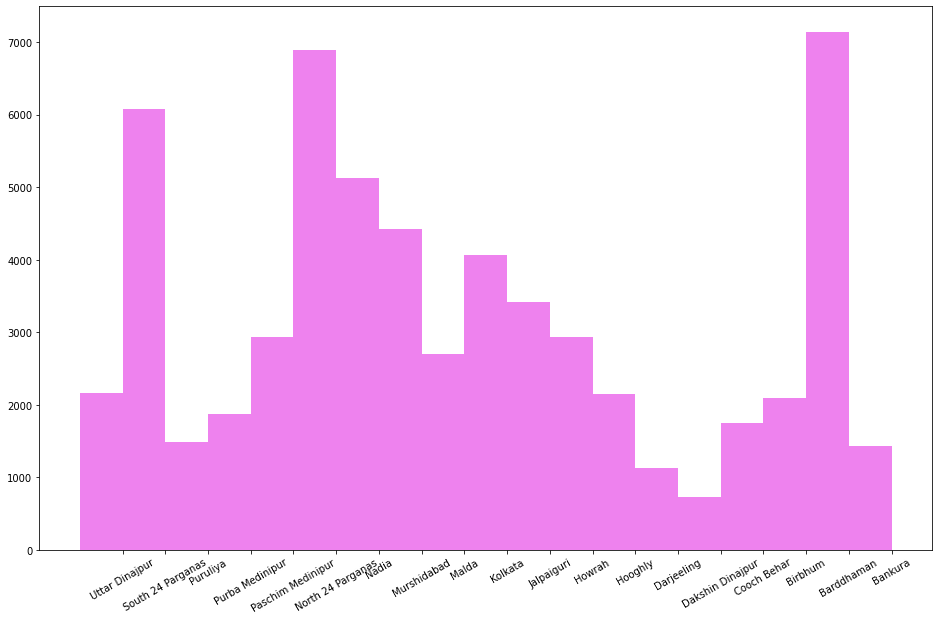

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='violet')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)